/var/folders/6m/v35frvfd7b1g46386pz6bxpc0000gn/T/ipykernel_74318/1275072521.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  fx_data = yf.download(fx_pair, start=start, end=end)['Close']
[*********************100%***********************]  1 of 1 completed


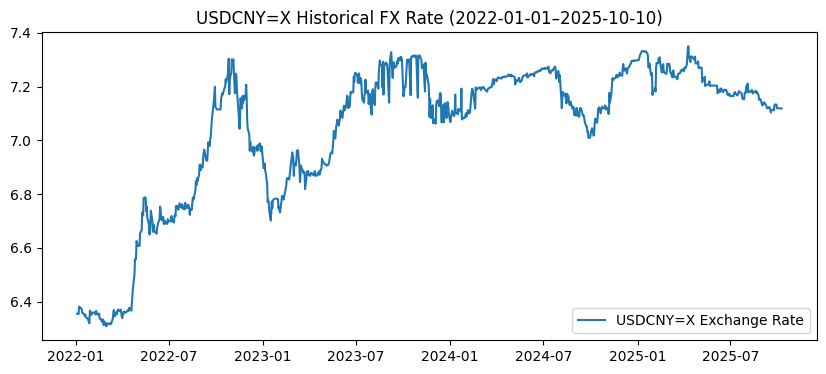


[USDCNY=X] GARCH(1,1)-t summary:
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                     USDCNY=X   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -68.2814
Distribution:      Standardized Student's t   AIC:                           146.563
Method:                  Maximum Likelihood   BIC:                           171.001
                                              No. Observations:                  980
Date:                      Mon, Nov 17 2025   Df Residuals:                      979
Time:                              11:50:00   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
-----------------------------------------------

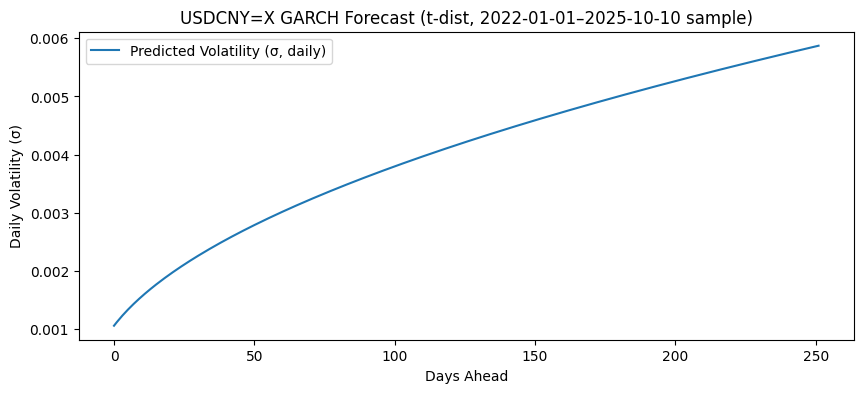

/var/folders/6m/v35frvfd7b1g46386pz6bxpc0000gn/T/ipykernel_74318/1275072521.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  fx_data = yf.download(fx_pair, start=start, end=end)['Close']
[*********************100%***********************]  1 of 1 completed

[USDCNY=X] Annualized Volatility (2022–2025, t-dist) ≈ 6.38%



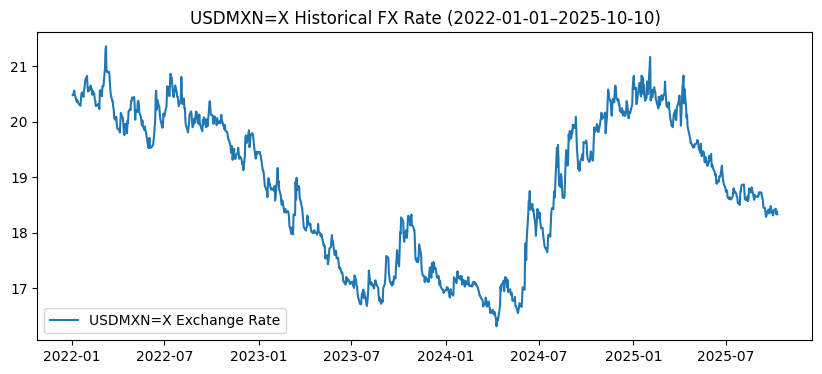


[USDMXN=X] GARCH(1,1)-t summary:
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                     USDMXN=X   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -952.251
Distribution:      Standardized Student's t   AIC:                           1914.50
Method:                  Maximum Likelihood   BIC:                           1938.94
                                              No. Observations:                  980
Date:                      Mon, Nov 17 2025   Df Residuals:                      979
Time:                              11:50:00   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
-------------------------------------------------

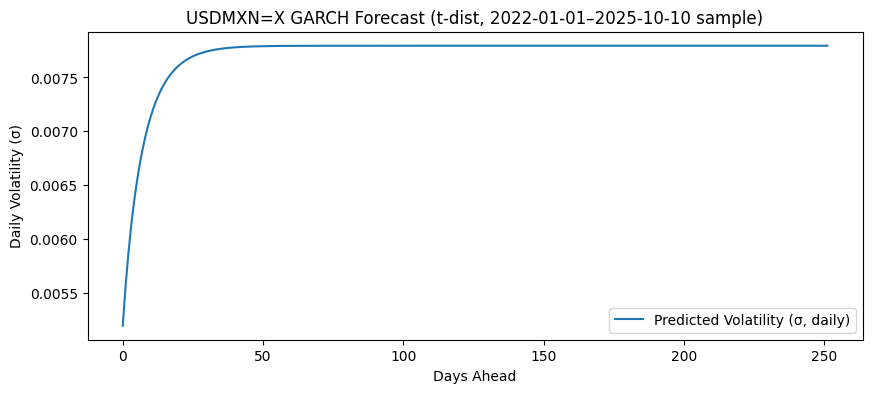

[USDMXN=X] Annualized Volatility (2022–2025, t-dist) ≈ 12.24%



In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from arch import arch_model
import matplotlib.pyplot as plt

def garch_fx_vol(fx_pair, start="2022-01-01", end="2025-10-10"):
    # 1. 下载汇率数据
    fx_data = yf.download(fx_pair, start=start, end=end)['Close']
    fx_data = fx_data.dropna()
    fx_data.name = "FXRate"

    # 2. 计算 log-return
    returns = np.log(fx_data / fx_data.shift(1)).dropna()

    # 画一下历史汇率
    plt.figure(figsize=(10, 4))
    plt.plot(fx_data, label=f'{fx_pair} Exchange Rate')
    plt.title(f"{fx_pair} Historical FX Rate ({start}–{end})")
    plt.legend()
    plt.show()

    # 3. GARCH(1,1) + t 分布
    model = arch_model(returns * 100, vol='Garch',
                       p=1, q=1, mean='constant', dist='t')
    fit = model.fit(disp="off")
    print(f"\n[{fx_pair}] GARCH(1,1)-t summary:")
    print(fit.summary())

    # 4. 预测未来一年 (252 交易日) 的波动率
    forecast = fit.forecast(horizon=252, reindex=False)

    # 取最后一期的 252 步预测方差 -> 日波动率
    sigma_row = forecast.variance.iloc[-1]          # h.1 ... h.252
    sigma_forecast = np.sqrt(sigma_row.to_numpy()) / 100.0  # 回到小数形式

    # 画预测波动率曲线
    plt.figure(figsize=(10, 4))
    plt.plot(sigma_forecast, label='Predicted Volatility (σ, daily)')
    plt.title(f"{fx_pair} GARCH Forecast (t-dist, {start}–{end} sample)")
    plt.xlabel("Days Ahead")
    plt.ylabel("Daily Volatility (σ)")
    plt.legend()
    plt.show()

    # 5. 年化波动率 = 日均波动率 × sqrt(252)
    annualized_vol = np.mean(sigma_forecast) * np.sqrt(252)
    print(f"[{fx_pair}] Annualized Volatility (2022–2025, t-dist) ≈ {annualized_vol:.2%}\n")

    return annualized_vol, sigma_forecast

# ---- 跑两个货币 ----
vol_cny, sigma_cny = garch_fx_vol('USDCNY=X')
vol_mxn, sigma_mxn = garch_fx_vol('USDMXN=X')


